### **Statistical libraries**
We’ll start again by importing some key libraries. We’ve used these libraries before, with the exception of the last one which is a useful module containing various probability distributions. In particular, it has useful functions that can generate values according to different probability distributions. Let’s re-do the experiment from the previous unit, once with sampling from a uniform distribution in numpy and then with the uniform distribution of stats module in scipy.

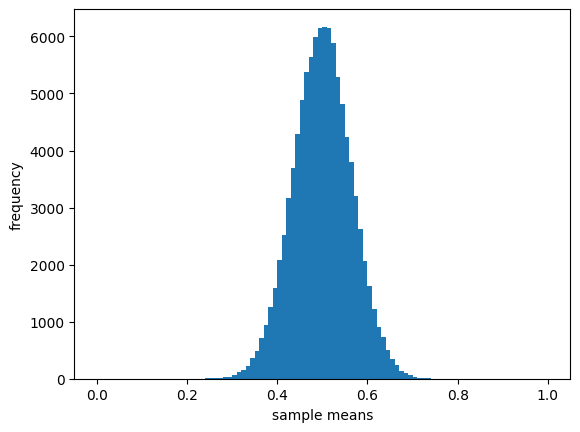

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
# Se crean nuevas medias en base a los datos generados (20 numeros random 100000 veces)
sample_means = []
experiments = 100000

for i in range(experiments): # drawing 100000 samples, each with 20 observations

    # drawing 20 observations from uniform(0,1) distribution
    sample = np.random.uniform(0,1,size = 20)  
    # taking the mean, and collecting them
    sample_means.append(np.mean(sample)) 

plt.hist(sample_means,bins=np.linspace(0,1,101));
plt.xlabel('sample means')
plt.ylabel('frequency')
plt.show()

By using the uniform distribution from stats module in scipy, we can even avoid the remaining loop because it allows us to specify the number of samples (i.e. 100,000) in the size parameter. All we need to do is specify a lower limit (i.e. 0), an upper limit (i.e. 1), and the number of values we want (i.e. 20). Let’s give it a try

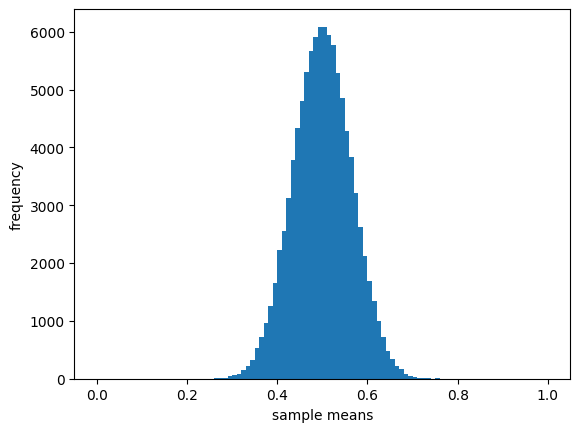

In [2]:
import scipy.stats as stats

# drawing 100000 samples, each with 20 observations from uniform(0,1) distribution 
sample = stats.uniform.rvs(0,1,size = (20,100000)) 
# taking the mean for each sample
sample_means = np.mean(sample,0)

plt.hist(sample_means,bins=np.linspace(0,1,101))
plt.xlabel('sample means')
plt.ylabel('frequency')
plt.show()

#### **The average of a dice roll**
Let’s look once again at the example of rolling a dice. We will simulate the experiment of rolling the dice in Python. In this case, we are interested in the uniform distribution, since each of the six outcomes is equally likely when throwing a dice.

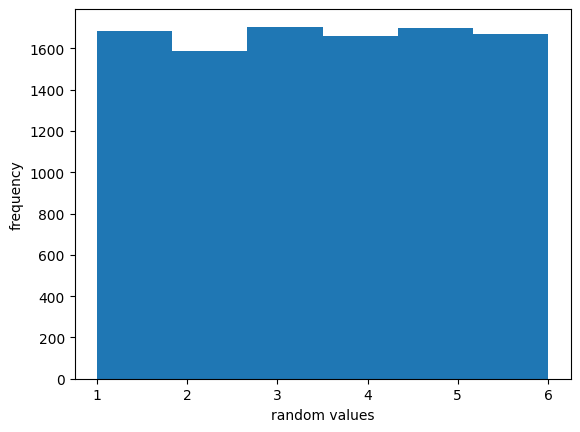

In [3]:
uniform_data = stats.uniform.rvs(1,6, size=10000).astype(int)

uniform_data
plt.hist(uniform_data, bins=6)
plt.xlabel('random values')
plt.ylabel('frequency')
plt.show()

So we can see that as expected, we get about the same number of each outcome. Now suppose we wanted to study the average of every five die rolls. To do this, let’s first define an array which holds the sums. We can do this in many ways in Python, one of them is by using the np.add.reduceat function from Numpy which allows us to take running sums of successive values.

In [4]:
indexes = np.arange(0, 10000, 5)
print(indexes)
print(len(indexes))
sums = np.add.reduceat(uniform_data, indexes)
print(sums)
sums = np.add.reduceat(uniform_data, indexes)
print(sums)
print(len(sums))
np.mean(sums / 5)

[   0    5   10 ... 9985 9990 9995]
2000
[17 18 25 ... 14 12 16]
[17 18 25 ... 14 12 16]
2000


3.5102999999999995

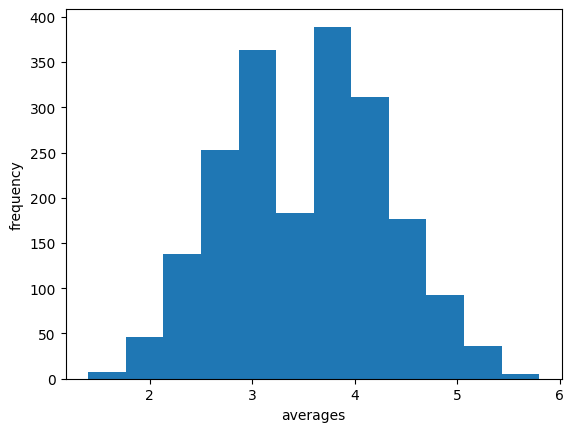

In [5]:
plt.hist(sums / 5, bins=12) 
plt.xlabel('averages')
plt.ylabel('frequency')
plt.show()

And this is once again exactly what the central limit theorem tells us: the dataset that we are drawing from is uniformly distributed, but the distribution of these sample means follows a bell curve. If you think about it, this is quite a remarkable fact: no matter what the distribution of the data that we sample from is, the distribution of the sample means will approach a normal distribution.

### **Linear Algebra** 

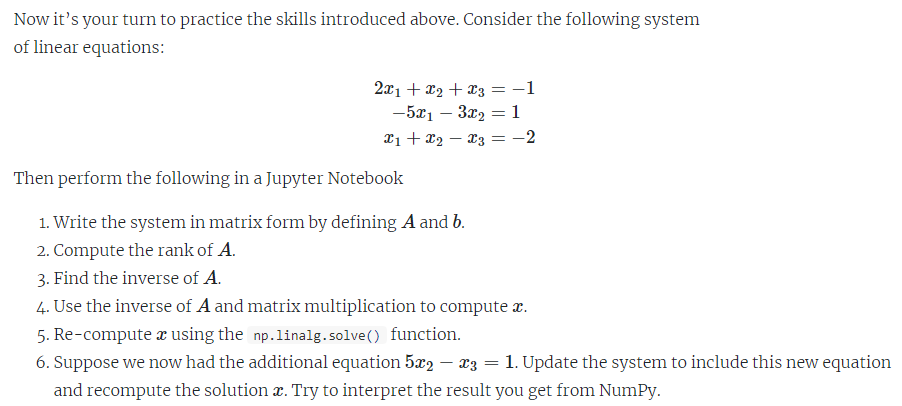

In [6]:
from IPython.display import Image
Image(filename="Exercise 4.png")

In [7]:
A= np.array([[2, 1, 1],[-5, -3, 0],[1, 1, -1]])
b=np.array([[-1], [1], [-2]])
np.linalg.matrix_rank(A)

3

In [8]:
A_inv=np.linalg.inv(A)

In [9]:
np.dot(A_inv,b)

array([[  7.],
       [-12.],
       [ -3.]])

In [10]:
np.linalg.solve(A,b)

array([[  7.],
       [-12.],
       [ -3.]])

It is not possible to update the system, generating a new result because, the matrix is no longer invertible and vector b has not been approprietly updated.